# **Determinants of Global Life Expectancy**
## A Multiple Linear Regression Analysis using WHO Data

Name: Nandana Sreejith(2362629)

Course: Artificial Intelligence with Python

**Introduction**

Life expectancy is one of the most important indicators of a country's overall development and public health performance. It reflects the combined impact of healthcare systems, economic conditions, education levels, and disease burden.

This study applies multiple linear regression to analyze the key socio-economic and health-related factors that influence life expectancy across countries.

**Research Objective**

The objective of this study is to identify significant determinants of life expectancy and to develop a multiple linear regression model that quantifies the impact of selected health and economic indicators.

**Dataset Description**

The dataset used in this analysis is the WHO Life Expectancy dataset, containing country-level data from 2000 to 2015. It includes various socio-economic and health indicators such as adult mortality, HIV/AIDS prevalence, schooling, GDP, BMI, and income composition of resources.

The dependent variable in this study is Life expectancy, which is continuous and appropriate for regression modeling.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/122010302003/Life-Expectancy/refs/heads/main/Life_Expectancy_Data.csv"
df = pd.read_csv(url)

df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Dataset Structure**

Before building the regression model, the dataset is examined to understand the number of observations, variable types, and presence of missing values.

In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Data Cleaning**

Missing values are handled to ensure the regression model does not fail.
The categorical variable “Status” is converted into numerical form.

In [3]:
# Convert Status to numeric
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

# Fill missing numerical values with mean
df = df.fillna(df.mean())

df.isnull().sum()

,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0


**Correlation Analysis**

A correlation matrix is generated to examine linear relationships between life expectancy and other variables.

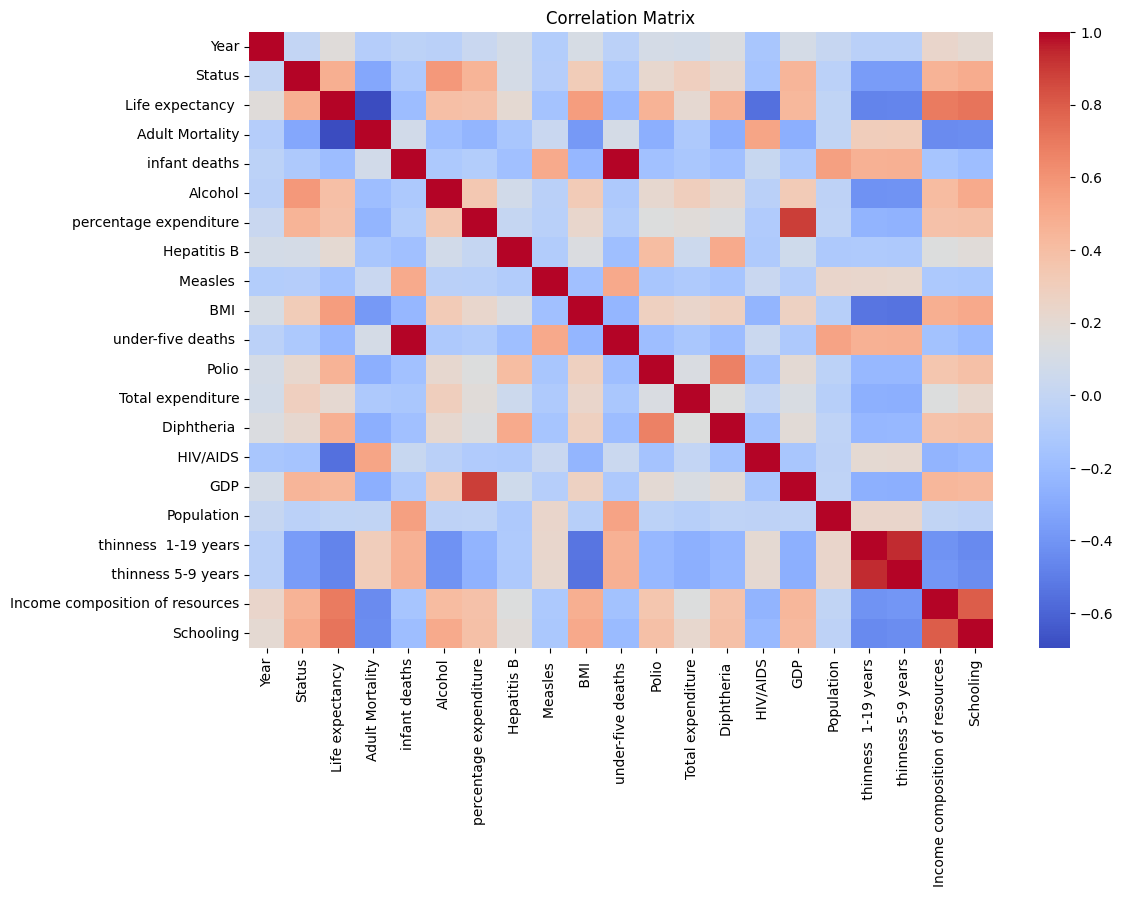

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows strong positive relationships between life expectancy and schooling as well as income composition of resources. Adult mortality and HIV/AIDS show strong negative correlations. Some predictors are highly correlated with each other, indicating potential multicollinearity. Therefore, only selected independent variables are chosen for regression modeling.

**Selection of Variables**

In [5]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**Cleaning Column Names**

The dataset contains leading and trailing spaces in column names. These are removed to ensure accurate variable referencing and prevent indexing errors.

In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

**Defining Independent and Dependent Variables**

After cleaning column names, the independent variables (predictors) and dependent variable (life expectancy) are defined for regression modeling.

In [7]:
features = [
    'Adult Mortality',
    'HIV/AIDS',
    'Income composition of resources',
    'Schooling',
    'BMI',
    'GDP'
]

X = df[features]
y = df['Life expectancy']

**Handling Missing Values**

Missing numerical values are replaced using mean imputation to ensure the regression model can be trained without errors.

In [8]:
df = df.fillna(df.mean())
df.isnull().sum()

,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0


**Train-Test Split**

The dataset is divided into training and testing sets.
The training set (80%) is used to build the regression model, while the testing set (20%) is used to evaluate model performance on unseen data.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (2350, 6)
Testing samples: (588, 6)


**Model Development**

A multiple linear regression model is trained using the selected socio-economic and health-related predictors to estimate life expectancy.

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

**Model Evaluation**

The performance of the regression model is evaluated using:

1.   Mean Squared Error (MSE)
2.   R-squared (R²)
3.   Adjusted R-squared

R-squared indicates the proportion of variance in life expectancy explained by the model.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = len(y)
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Squared Error:", mse)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

Mean Squared Error: 19.027032871900232
R2: 0.7803777681436345
Adjusted R2: 0.7799281832268353


**Actual vs Predicted Values**

This scatter plot compares actual life expectancy values with predicted values. A strong linear pattern close to the diagonal line indicates good model performance.

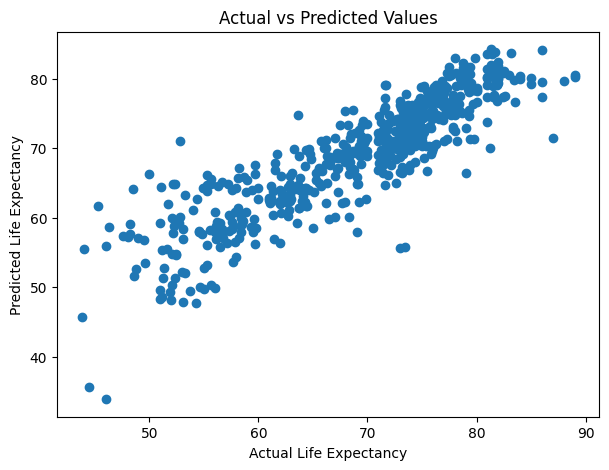

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Values")
plt.show()

**Residual Analysis**

Residuals (actual − predicted values) are plotted against predicted values to check for homoscedasticity and linearity. A random scatter around zero suggests that model assumptions are reasonably satisfied.

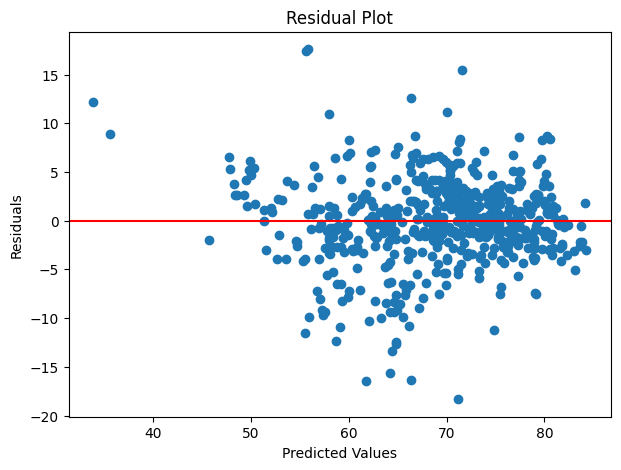

In [13]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Distribution of Residuals**

A histogram of residuals is plotted to examine whether they approximately follow a normal distribution.

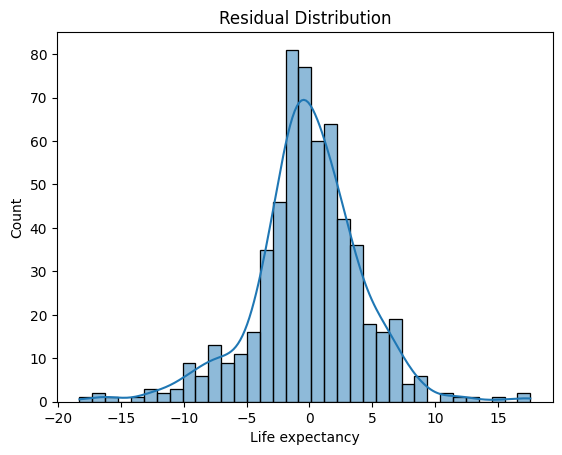

In [14]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

**Model Performance Interpretation**

The regression model achieved an R-squared value of 0.78, indicating that approximately 78% of the variation in life expectancy across countries is explained by the selected socio-economic and health-related predictors.

The Adjusted R-squared value of 0.7799 is very close to the R-squared value, suggesting that the selected predictors are relevant and that the model does not suffer from overfitting due to unnecessary variables.

The Mean Squared Error (19.03) indicates the average squared difference between predicted and actual life expectancy values. Given the global variability in life expectancy, this error magnitude is reasonable and reflects good predictive performance.

Overall, the model demonstrates strong explanatory power and captures the key determinants influencing life expectancy.

In [15]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients

,Feature,Coefficient
0,Adult Mortality,-0.022557
1,HIV/AIDS,-0.466432
2,Income composition of resources,8.483771
3,Schooling,0.840974
4,BMI,0.060954
5,GDP,0.000053


**Interpretation of Coefficients**

The regression coefficients indicate the direction and magnitude of influence of each predictor on life expectancy, holding other variables constant.

Positive coefficients (such as Schooling and Income composition of resources) indicate that improvements in education and economic development are associated with increases in life expectancy.

Negative coefficients (such as Adult Mortality and HIV/AIDS) indicate that higher disease burden and mortality significantly reduce life expectancy.

The magnitude of each coefficient reflects how strongly that variable impacts longevity compared to others.

**Statistical Significance of Predictors**

To evaluate the statistical significance of each predictor variable, an Ordinary Least Squares (OLS) regression model is fitted using the statsmodels library. This provides p-values and confidence intervals for each coefficient.

In [16]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1733.
Date:                Sat, 28 Feb 2026   Prob (F-statistic):               0.00
Time:                        06:29:34   Log-Likelihood:                -8560.3
No. Observations:                2938   AIC:                         1.713e+04
Df Residuals:                    2931   BIC:                         1.718e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Interpretation of Statistical Results**

Variables with p-values less than 0.05 are considered statistically significant predictors of life expectancy. The results indicate that key socio-economic and health indicators significantly influence longevity outcomes.

The R-squared value confirms that the model explains approximately 78% of the variation in life expectancy, indicating strong explanatory power.

**Final Report Summary**

**Objective**

To analyze the determinants of life expectancy using WHO global health and socio-economic data and to build a multiple linear regression model to quantify their impact.

**Dataset**

WHO Life Expectancy Dataset (2000–2015), containing country-level health and economic indicators.

**Methodology**
1. Data cleaning and preprocessing
2. Correlation analysis
3. Feature selection
4. Multiple linear regression modeling
5. Model evaluation using R² and Adjusted R²
6. Diagnostic plots for regression assumptions

**Key Findings**

The model explains approximately 78% of the variability in life expectancy. Education and income composition show positive influence, while adult mortality and HIV/AIDS negatively impact life expectancy.

**Conclusion**

Life expectancy is strongly influenced by a combination of socio-economic development and health-related factors. The regression model provides a meaningful quantitative framework for understanding global longevity patterns.